In [1]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq

In [2]:
pytrend = TrendReq()
def generate_related_queries(kw_csv, timeframe_str):
    kw_csv= kw_csv['keywords'].to_list()
    print(kw_csv)
    x = pytrend.build_payload(kw_csv, cat=0, timeframe=timeframe_str, geo='SG', gprop='')

    trends = pytrend.related_queries()
    
    #initialize dataframes to fill during iteration
    query_df = pd.DataFrame(columns=['keywords','value'])
    for k in trends:
        top = trends[k]['top']
        rising = trends[k]['rising']
        if (top is not None) and (rising is not None):
            top_query = trends[k]['top']['query'].to_list()
            top_values = trends[k]['top']['value'].to_list()
            rising_query = trends[k]['rising']['query'].to_list()
            for i in range(max(len(top_query),len(rising_query))):
                if i < len(top_query):
                    query_df=query_df.append({'keywords':top_query[i],'value':top_values[i]}, ignore_index=True)
                if i < len(rising_query):
                    query_df=query_df.append({'keywords':rising_query[i], 'value':top_values[i]}, ignore_index=True)
        elif (rising is None) and (top is None):
            continue
        elif rising is None:
            top_query = trends[k]['top']['query'].to_list()
            top_values = trends[k]['top']['value'].to_list()
            for i in range(len(top_query)):
                query_df=query_df.append({'keywords':top_query[i],'value':top_values[i]}, ignore_index=True)
            
        else:
            rising_query = trends[k]['rising']['query'].to_list()
            for i in range(len(rising_query)):
                query_df=query_df.append({'keywords':rising_query[i],'value':top_values[i]}, ignore_index=True)
    query_df= query_df.drop_duplicates()
    query_df = query_df.sort_values(by=['value'])
    query_df.to_csv("related_keywords.csv")
    return query_df


kw_csv = pd.read_csv('google_trends.csv')

timeframe_str ='2020-01-01 2021-01-01'
generate_related_queries(kw_csv, timeframe_str)

        
    

['Youtube', 'Twitter', 'panic', 'panic attack', 'anxiety attack', 'depression symptoms', 'relaxation', 'meditation', 'guided meditations', 'low self esteem', 'self love quotes', 'self sufficient', 'self worth quotes', 'Emotional well-being', 'Spirituality', 'Stress management', 'fatigue', 'loss of appetite', 'sick', 'emptiness', 'hopeless']


ResponseError: The request failed: Google returned a response with code 400.

In [8]:
#This function generates search counts over time for each keyword, 
#edit the input parameters and change keywords in the file
def generate_kw_counts(date_str, country, category, search_type):
    kw_csv = pd.read_csv('google_trends.csv')
    kw_csv= kw_csv['keywords'].to_list()
    keyword_codes=[]
    titles=[]
    for kw in kw_csv:
        kw_suggestion = pytrend.suggestions(keyword=kw)
        if kw_suggestion:
            keyword_codes.append(kw_suggestion[0])
            titles.append(kw_suggestion[0]['title'])
        else:
            pass
    df_codes = pd.DataFrame(keyword_codes)
    df_codes
    exact_keywords = df_codes['mid'].to_list()
    
    list_of_keywords = list(zip(*[iter(exact_keywords)]*1))
    list_of_keywords = [list(x) for x in list_of_keywords]
    
    kw_df = pd.DataFrame()
    count=0
    for keyword in list_of_keywords:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = date_str, 
                              geo = country, 
                              cat= category,
                              gprop= search_type) 

        pytrend_df = pytrend.interest_over_time()
        if not pytrend_df.empty:
            pytrend_df = pytrend_df[pytrend_df.columns[0]]
            kw_df = kw_df.append(pytrend_df)
        else:
            titles.pop(count)
            continue
        count+=1

    kw_df= kw_df.T
    kw_df.columns = titles

  
    kw_df = kw_df.loc[:,~kw_df.columns.duplicated()]
    
    kw_df = kw_df.drop(['Nothing', 'Sick AG'], axis=1)
    
    kw_df.info()
    kw_df.to_csv("result.csv")
    return kw_df

date_str = '2019-01-06 2021-07-04'
country = 'SG'
category=0
search_type=''
results_df = generate_kw_counts(date_str, country, category, search_type)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2019-01-06 to 2021-07-04
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Panic                 131 non-null    float64
 1   Panic attack          131 non-null    float64
 2   Relaxation            131 non-null    float64
 3   Meditation            131 non-null    float64
 4   Emotional well-being  131 non-null    float64
 5   Spirituality          131 non-null    float64
 6   Stress management     131 non-null    float64
 7   Fatigue               131 non-null    float64
 8   Anorexia              131 non-null    float64
 9   Hopelessness          131 non-null    float64
dtypes: float64(10)
memory usage: 11.3 KB


In [9]:
# import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"
results_df
results_df.plot()
plt.show()

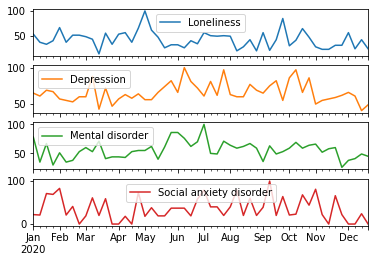

In [8]:
pd.options.plotting.backend = "matplotlib"
axes = results_df.plot.line(subplots=True)
from matplotlib.pyplot import figure